In [21]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.callbacks
from sklearn import preprocessing as pp
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import SGD, Adam, Nadam, Adamax, Adadelta, Adagrad, Ftrl, RMSprop, Optimizer
from keras_visualizer import visualizer
from sklearn.preprocessing import StandardScaler

In [22]:
filename = "/Users/romi_sai/Desktop/College/Senior/Summer2021/CSE474/Assignments/Assignment2/diabetes.csv"

In [23]:
#opening csv & reading in rows 
#some parts of this code was found on Python Docs (https://docs.python.org/3/library/csv.html)
with open(filename, newline='') as csvfile:
    lines = csv.reader(csvfile)
    rows=[]
    for row in lines:
        rows.append(row)

In [24]:
#Converting the age, bmi, glucose and outcome to lists for easy access
pregnancies=[]
glucose=[]
bp=[]
skinthickness=[]
insulin=[]
bmi=[]
pedigree=[]
age=[]
out=[]
for thing in rows:
    pregnancies.append(thing[0])
    glucose.append(thing[1])
    bp.append(thing[2])
    skinthickness.append(thing[3])
    insulin.append(thing[4])
    bmi.append(thing[5])
    pedigree.append(thing[6])
    age.append(thing[7])
    out.append(thing[8])
    
    
pregnancies.remove('Pregnancies')
glucose.remove('Glucose')
bp.remove("BloodPressure")
skinthickness.remove("SkinThickness")
insulin.remove("Insulin")
bmi.remove("BMI")
pedigree.remove("DiabetesPedigreeFunction")
age.remove("Age")
out.remove("Outcome")


### Prep: Extracting, Splitting & Normalizing data

In [25]:
#defining the train and test datasets for the features: age, bmi and glucose for X and charges for Y
#train_bias=[]
train_gluc=[]
train_bmi=[]
train_age=[]
train_out=[]
#test_bias=[]
test_age=[]
test_bmi=[]
test_gluc=[]
test_out=[]
#80%
for i in range(0, 614, 1):
   # train_bias.append(1)
    train_gluc.append(glucose[i])
    train_bmi.append(bmi[i])
    train_age.append(age[i])
    train_out.append(out[i])

#20%   
for j in range(614, 768, 1):
    #print(j)
    #test_bias.append(1)
    test_age.append(age[j])
    test_bmi.append(bmi[j])
    test_gluc.append(glucose[j])
    test_out.append(out[j])

In [26]:
###Converting the lists from strings to integers and floats
##This function was found on the numpy docs (https://numpy.org/doc/stable/reference/generated/numpy.matrix.html)
Xtrain = np.matrix((train_gluc, train_bmi,train_age), dtype=float)
Xtrain = Xtrain.transpose()

Xtest = np.matrix((test_gluc, test_bmi, test_age), dtype=float)
Xtest = Xtest.transpose()

Ytrain = np.matrix((train_out), dtype=float)
Ytrain = Ytrain.transpose()

Ytest = np.matrix((test_out), dtype=float)
Ytest = Ytest.transpose()

#print(Xtest.shape)
#Xtest.shape

In [27]:
##Normalizing the data
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)

scaler.fit(Xtest)
Xtest = scaler.transform(Xtest)

## not normalizing the Ytest and Ytrain bc only the features need to be normalized for us to predict the right outcomes. 

# Part 1: Implementing a Neural Network with One Hidden Layer

In [69]:
# Creating the model.
model = Sequential()

# Adding layers to the model using Dense(#neurons, activation func, dimensions of the input layer)
model.add(Dense(90, activation='relu', input_dim=3))  # Hidden layer.

#Using sigmoid because it's a binary classification
model.add(Dense(2, activation='sigmoid'))  # Output layer.
#visualizer(model, format='png', view=True)

model.compile(optimizer=Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
#lowering the batch_size is increasing accuracy!
history = model.fit(Xtrain, to_categorical(Ytrain),
                    validation_data=(Xtest, to_categorical(Ytest)), epochs=80, batch_size=60)

# Evaluating the model - TEST DATA
print('\n\n\n TESTING LOSS vs ACCURACY')
loss, accuracy = model.evaluate(Xtest, to_categorical(Ytest))
print('\n Loss', loss, 'Accuracy:', accuracy)


# Evaluating model using TRAINING DATA
print('\n\n\n TRAINING LOSS vs ACCURACY')
loss_tr, acc = model.evaluate(Xtrain, to_categorical(Ytrain))
print('\n Loss', loss_tr, 'Accuracy:', acc)

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 90)                360       
_________________________________________________________________
dense_119 (Dense)            (None, 2)                 182       
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
11/11 [==============================] - 0s 11ms/step - loss: 0.6879 - accuracy: 0.5000 - val_loss: 0.6646 - val_accuracy: 0.5779
Epoch 2/80
11/11 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5309 - val_loss: 0.6592 - val_accuracy: 0.6234
Epoch 3/80
11/11 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5700 - val_loss: 0.6543 - val_accuracy: 0.6818
Epoch 4/80
11/11 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 

Epoch 55/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7459 - val_loss: 0.5319 - val_accuracy: 0.7922
Epoch 56/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7492 - val_loss: 0.5307 - val_accuracy: 0.7922
Epoch 57/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7508 - val_loss: 0.5295 - val_accuracy: 0.7922
Epoch 58/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7492 - val_loss: 0.5283 - val_accuracy: 0.7987
Epoch 59/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7524 - val_loss: 0.5272 - val_accuracy: 0.7987
Epoch 60/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7541 - val_loss: 0.5261 - val_accuracy: 0.7987
Epoch 61/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7557 - val_loss: 0.5249 - val_accuracy: 0.7987
Epoch 62/80
1

## Plotting the graphs 

### Train vs Validation Accuracy

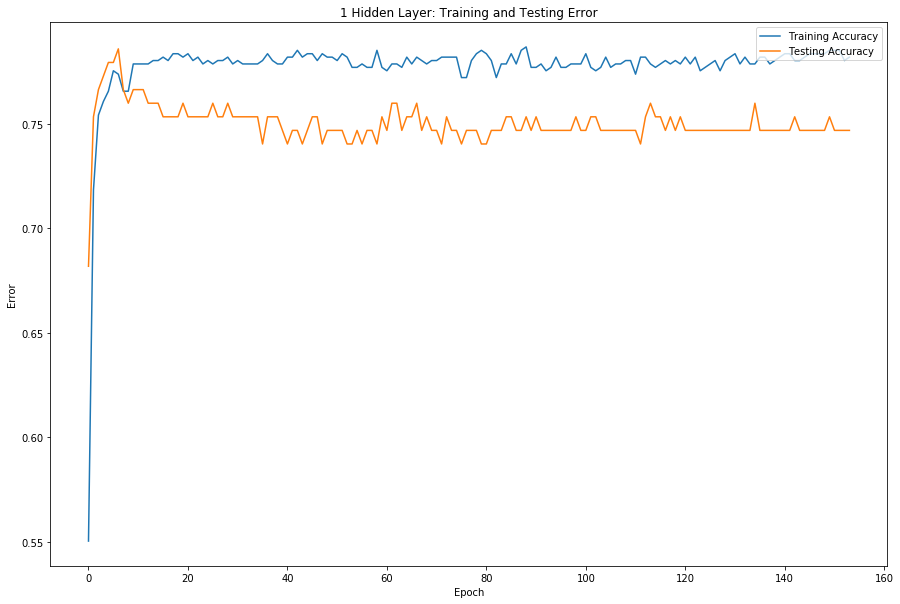

In [9]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1 Hidden Layer: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()


### Train vs Validation Loss

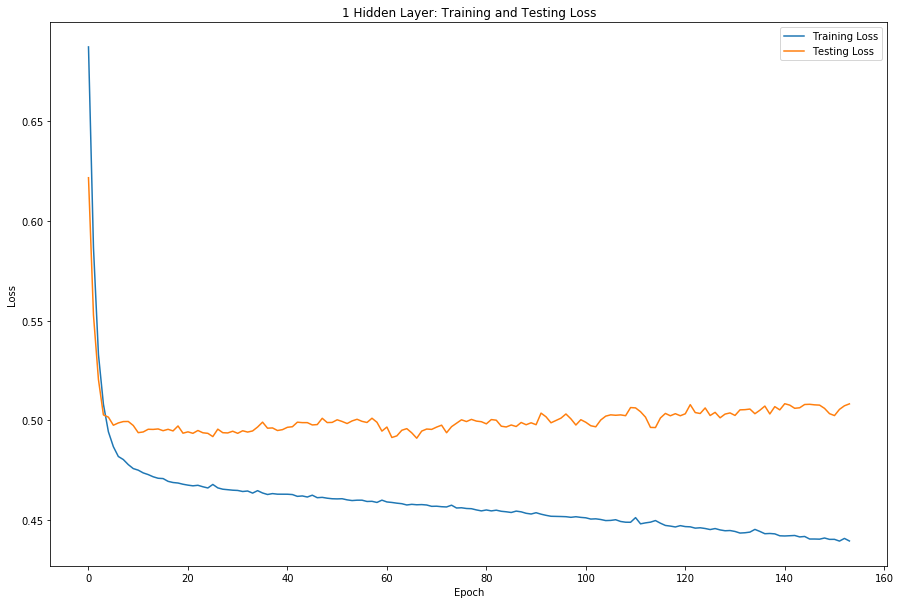

In [10]:
# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('1 Hidden Layer: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

In [28]:
# Neural Network with Three Hidden Layers.

# Creating the model.
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3, kernel_regularizer='l2'))
model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dense(2, activation='sigmoid'))
#visualizer(model, format='png', view=True)

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(Xtrain, to_categorical(Ytrain),
                    validation_data=(Xtest, to_categorical(Ytest)), epochs=100, batch_size=64)

# Evaluating the model - TEST DATA
print('\n\n\n TESTING LOSS vs ACCURACY')
l, a = model.evaluate(Xtest, to_categorical(Ytest))
print('\n Loss', l, 'Accuracy:', a)


# Evaluating model using TRAINING DATA
print('\n\n\n TRAINING LOSS vs ACCURACY')
ll, ac = model.evaluate(Xtrain, to_categorical(Ytrain))
print('\n Loss', ll, 'Accuracy:', ac)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               2048      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 258       
Total params: 166,530
Trainable params: 166,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
10/10 [==============================] - 0s 16ms/step - loss: 5.8854 - accuracy: 0.3485 - val_loss: 5.8767 - val_accuracy: 0.3571
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 5.8671 - accuracy: 0.3599

10/10 [==============================] - 0s 4ms/step - loss: 5.0599 - accuracy: 0.7752 - val_loss: 5.0613 - val_accuracy: 0.7662
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 5.0456 - accuracy: 0.7769 - val_loss: 5.0471 - val_accuracy: 0.7662
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 5.0313 - accuracy: 0.7752 - val_loss: 5.0330 - val_accuracy: 0.7662
Epoch 55/100
10/10 [==============================] - 0s 4ms/step - loss: 5.0172 - accuracy: 0.7736 - val_loss: 5.0190 - val_accuracy: 0.7662
Epoch 56/100
10/10 [==============================] - 0s 4ms/step - loss: 5.0030 - accuracy: 0.7752 - val_loss: 5.0050 - val_accuracy: 0.7662
Epoch 57/100
10/10 [==============================] - 0s 4ms/step - loss: 4.9890 - accuracy: 0.7752 - val_loss: 4.9911 - val_accuracy: 0.7662
Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 4.9750 - accuracy: 0.7752 - val_loss: 4.9771 - val_accuracy: 0.7662
Epoch 59/100
10/10 